In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/drive/MyDrive/ML_projects/creditcard/creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
print(set(data['Class']))

{0, 1}


In [5]:
## split the frouded data from main data
froud = data[data['Class']==1]

not_froud = data[data['Class']==0]

# froud

In [6]:
froud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [7]:
not_froud['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
## drop unused columns
data = data.drop(['Time'],axis=1)

## Split data to train and test

In [9]:
## scale Amount column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

data['Amount'] = sc.fit_transform(data['Amount'].values.reshape(-1,1))

from sklearn.model_selection import train_test_split
Y = data.iloc[:,29:].values
X = data.iloc[:,:29].values
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.callbacks import ModelCheckpoint,TensorBoard

In [11]:
input_dim = x_train.shape[1]
encoding_dim = 14

In [12]:
input_layers = Input(shape=(input_dim,))

encoder = Dense(encoding_dim,activation="tanh",activity_regularizer=regularizers.l1(10e-5))(input_layers)
encoder = Dense(int(encoding_dim/2),activation='relu')(encoder)

decoder = Dense(int(encoding_dim/2),activation='tanh')(encoder)
decoder = Dense(int(input_dim),activation='relu')(decoder)

autoencoder = Model(inputs=input_layers,outputs=decoder)

In [13]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error')

In [14]:
checkpoint = ModelCheckpoint(filepath='model.h5',verbose=0,save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',histogram_freq=0,write_graph=True,write_images=True)
his = autoencoder.fit(x_train,y_train,epochs=100,batch_size=32,shuffle=True,validation_split=0.3,verbose=1,callbacks=[checkpoint,tensorboard])

Epoch 1/100
4175/4175 [==============================] - 19s 4ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 2/100
4175/4175 [==============================] - 16s 4ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 3/100
4175/4175 [==============================] - 14s 3ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 4/100
4175/4175 [==============================] - 14s 3ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 5/100
4175/4175 [==============================] - 16s 4ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 6/100
4175/4175 [==============================] - 16s 4ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 7/100
4175/4175 [==============================] - 15s 3ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/100
4175/4175 [==============================] - 16s 4ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 9/100
4175/4175 [==============================] - 14s 3ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 10/100
4175/4175 [==============================] - 14s 3m

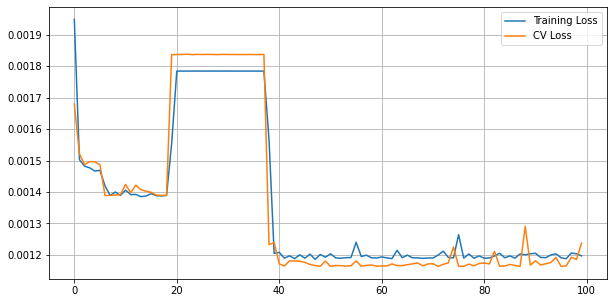

In [15]:
plt.figure(figsize=(10,5))
plt.plot(his.history['loss'],label='Training Loss')
plt.plot(his.history['val_loss'],label='CV Loss')
plt.grid()
plt.legend()
plt.show()

In [16]:
pred = autoencoder.predict(x_test)


array([[0.        , 0.63996154, 0.64582163, ..., 0.65841043, 0.6315965 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

## Evaluation

In [37]:
mse = np.mean(np.power(x_test-pred,2),axis=1)
err_df = pd.DataFrame({'error':mse,'true_values':y_test.flatten()})


,error,true_values
0,85.0,1
1,1.0,0
2,0.0,0
3,1.0,0
4,0.0,0
...,...,...
93982,1.0,0
93983,0.0,0
93984,1.0,0
93985,0.0,0


In [38]:
err_df.groupby(['true_values']).describe()

error                                                   
               count       mean        std  min  25%   50%   75%    max
true_values                                                            
0            93838.0   0.998167   3.129697  0.0  0.0   1.0   1.0  276.0
1              149.0  33.778523  43.922666  0.0  5.0  12.0  64.0  264.0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


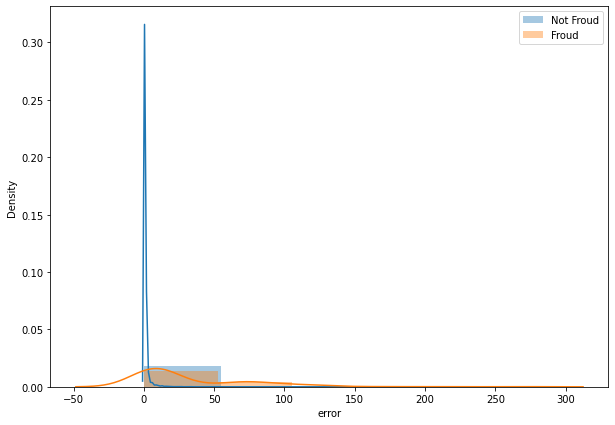

In [39]:
plt.figure(figsize=(10,7))
sns.distplot(err_df[err_df['true_values'] == 0]['error'],bins=5,label='Not Froud')
sns.distplot(err_df[err_df['true_values'] == 1]['error'],bins=5,label='Froud')
plt.legend()
plt.show()

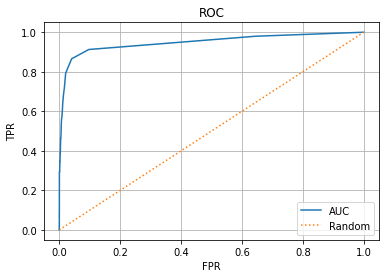

In [40]:
from sklearn.metrics import (confusion_matrix,precision_recall_curve,auc,roc_curve,recall_score,classification_report,f1_score,precision_recall_fscore_support)

treshhold = 1.4
fpr, tpr, thres = roc_curve(err_df['true_values'], err_df['error'])
plt.plot(fpr, tpr, label = 'AUC') 
plt.plot([0,1], [0,1], ':', label = 'Random') 
plt.legend() 
plt.grid() 
plt.ylabel("TPR") 
plt.xlabel("FPR") 
plt.title('ROC') 
plt.show()

[[90030  3808]
 [   20   129]]


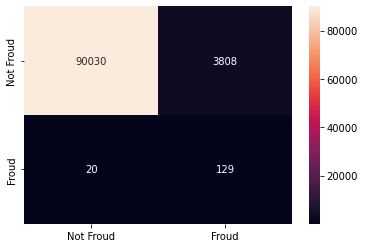

In [43]:
## round err_df data
## treshhodl = 2 
y_pred = [1 if i > 2 else 0 for i in err_df['error'].values]

cm = confusion_matrix(err_df['true_values'],y_pred)
print(cm)

sns.heatmap(cm,annot=True,fmt='d',yticklabels=['Not Froud','Froud'],xticklabels=['Not Froud','Froud'])

In [46]:
from sklearn.metrics import roc_auc_score
print("Area Under ROC :",roc_auc_score(err_df['true_values'],y_pred))

Area Under ROC : 0.9125956185234843
